In [1]:
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go

from random import Random

# Input Data

In [2]:
# Number of random samples
nsample = 10000
# Discount rate : WACC between 3 and 8%
r = np.random.uniform(0.03,0.08,nsample)
# Production period from Table A1.1 (IRENA 2020)
production_period = 25
# Electric power [W]
power_electric = 6e6
# Load Factor from (IRENA 2020) for the world
loadfactor = np.random.uniform(0.30,0.50,nsample)
# Total Installed cost ranges and weighted averages for onshore wind projects for Europe (IRENA 2020)
# [q5 - med - q95] = [2696 - 3394 - 5840] $2020 / kW
dollar_to_euro = 0.85
mu, sigma = 3394*dollar_to_euro, 400 # order of magnitude...
cost_construction_occ = np.random.normal(mu,sigma,nsample) * power_electric*1e-3
# Weighted-average O&M costs from IRENA 2020
# OFF SHORE = [70 - 129] $2020/kW/an
cost_fix_om = np.random.uniform(70,129,nsample) * dollar_to_euro * power_electric*1e-3


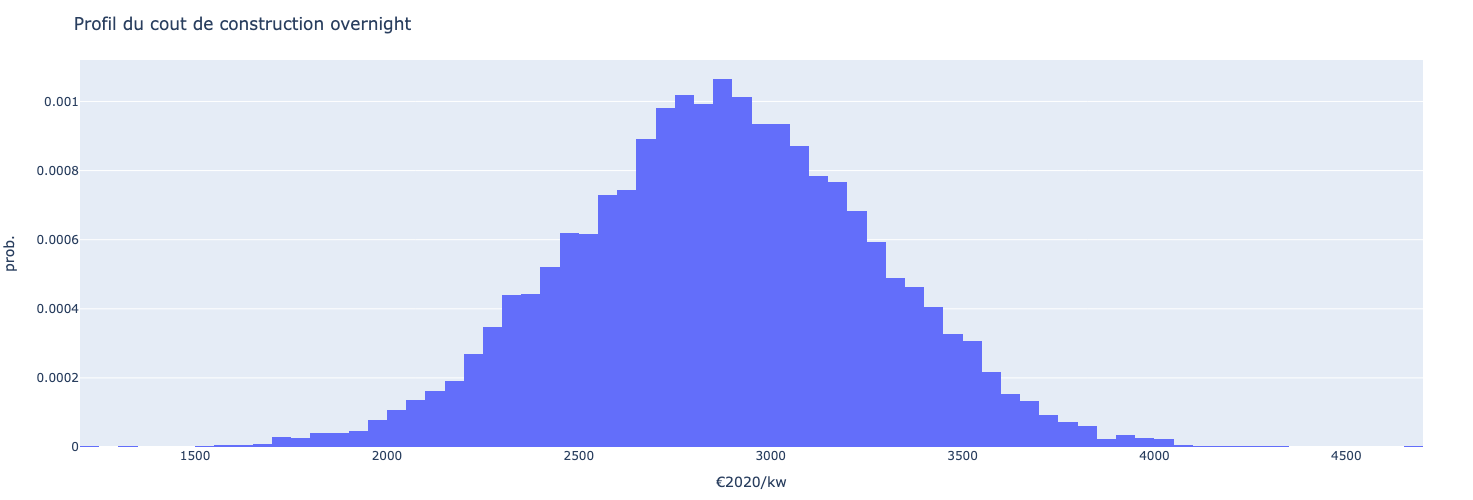

In [8]:
fig = go.Figure()

fig.add_trace(go.Histogram(x=cost_construction_occ/(power_electric*1e-3),name="OCC",histnorm='probability density'))

fig.update_layout(title="Profil du cout de construction overnight",
                  xaxis_title="€2020/kw",
                  yaxis_title="prob.",
                  width=1000,
                  height=500,
                  margin=dict(l=50,r=50,b=30,t=60),
                  legend=dict(y=0.85,x=0.75)
                 )                 

# LCOE Calculation

In [9]:
df = pd.DataFrame(columns = ['dr','lt','ep','lf','cc','omc','lcoe','om_f','c_f'])

for s in list(range(nsample)):
    levelized_energy = 0
    levelized_cost_om = 0
    for t in list(range(production_period)):
        levelized_energy += power_electric * loadfactor[s] * 1e-6 * 365.25 * 24. / (1 + r[s])**(t+0.5)
        levelized_cost_om += cost_fix_om[s] / (1 + r[s])**(t+0.5)
    levelized_cost = cost_construction_occ[s] + levelized_cost_om
    om_frac = levelized_cost_om / levelized_cost
    cons_frac = cost_construction_occ[s] / levelized_cost
    lcoe = levelized_cost / levelized_energy

    to_append = [r[s],production_period,power_electric,loadfactor[s],cost_construction_occ[s],cost_fix_om[s],lcoe,om_frac,cons_frac]
    df.loc[len(df)] = to_append


# Plotting

In [10]:
fig = px.scatter(df, x="dr", y="lcoe", color="cc", log_x=False)
fig.update_xaxes(title="Discount rate")
fig.update_yaxes(title="LCOE (€2020/MWh)")
    
fig.update_layout(width=800,height=600,margin=dict(l=50,r=50,b=30,t=50))

fig.show()
df

,dr,lt,ep,lf,cc,omc,lcoe,om_f,c_f
0,0.070065,25.0,6000000.0,0.398476,1.674176e+07,525133.669439,91.359593,0.274259,0.725741
1,0.065718,25.0,6000000.0,0.447012,1.467688e+07,539707.956414,72.859565,0.315065,0.684935
2,0.052907,25.0,6000000.0,0.443837,1.551703e+07,527559.010367,69.910327,0.323261,0.676739
3,0.046130,25.0,6000000.0,0.380722,1.366591e+07,607262.394412,75.849088,0.399821,0.600179
4,0.038999,25.0,6000000.0,0.362511,1.623234e+07,533924.067259,80.902905,0.346132,0.653868
...,...,...,...,...,...,...,...,...,...
9995,0.070287,25.0,6000000.0,0.345755,1.277774e+07,413179.884406,81.151498,0.279976,0.720024
9996,0.066991,25.0,6000000.0,0.374058,2.026294e+07,598081.793979,113.653389,0.267477,0.732523
9997,0.052968,25.0,6000000.0,0.314084,1.535308e+07,553074.864582,99.667011,0.335918,0.664082
9998,0.036398,25.0,6000000.0,0.377570,1.535496e+07,482740.683242,71.093300,0.341929,0.658071
